# **Waste Material Segregation for Improving Waste Management**

## **Objective**

The objective of this project is to implement an effective waste material segregation system using convolutional neural networks (CNNs) that categorises waste into distinct groups. This process enhances recycling efficiency, minimises environmental pollution, and promotes sustainable waste management practices.

The key goals are:

* Accurately classify waste materials into categories like cardboard, glass, paper, and plastic.
* Improve waste segregation efficiency to support recycling and reduce landfill waste.
* Understand the properties of different waste materials to optimise sorting methods for sustainability.

## **Data Understanding**

The Dataset consists of images of some common waste materials.

1. Food Waste
2. Metal
3. Paper
4. Plastic
5. Other
6. Cardboard
7. Glass


**Data Description**

* The dataset consists of multiple folders, each representing a specific class, such as `Cardboard`, `Food_Waste`, and `Metal`.
* Within each folder, there are images of objects that belong to that category.
* However, these items are not further subcategorised. <br> For instance, the `Food_Waste` folder may contain images of items like coffee grounds, teabags, and fruit peels, without explicitly stating that they are actually coffee grounds or teabags.

## **1. Load the data**

Load and unzip the dataset zip file.

**Import Necessary Libraries**

In [1]:
# Recommended versions:

# numpy version: 1.26.4
# pandas version: 2.2.2
# seaborn version: 0.13.2
# matplotlib version: 3.10.0
# PIL version: 11.1.0
# tensorflow version: 2.18.0
# keras version: 3.8.0
# sklearn version: 1.6.1

In [2]:
# Import essential libraries

import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image
import tensorflow as tf
import sklearn
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import mean_squared_error

# Print formatted library versions
print("# numpy version:", np.__version__)
print("# pandas version:", pd.__version__)
print("# seaborn version:", sns.__version__)
print("# matplotlib version:", plt.matplotlib.__version__)
print("# PIL version:", Image.__version__)
print("# tensorflow version:", tf.__version__)
print("# keras version:", keras.__version__)
print("# sklearn version:", sklearn.__version__)


# numpy version: 2.1.3
# pandas version: 2.3.0
# seaborn version: 0.13.2
# matplotlib version: 3.10.3
# PIL version: 11.2.1
# tensorflow version: 2.19.0
# keras version: 3.10.0
# sklearn version: 1.7.0


Load the dataset.

In [3]:
# Load and unzip the dataset

dataset_path = 'data.zip'  # Replace with your dataset path
extracted_path = 'extracted_data'  # Replace with your unzip path


# Unzip the dataset
import zipfile
with zipfile.ZipFile(dataset_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_path)

print("Dataset unzipped successfully.")

Dataset unzipped successfully.


## **2. Data Preparation** <font color=red> [25 marks] </font><br>


### **2.1 Load and Preprocess Images** <font color=red> [8 marks] </font><br>

Let us create a function to load the images first. We can then directly use this function while loading images of the different categories to load and crop them in a single step.

#### **2.1.1** <font color=red> [3 marks] </font><br>
Create a function to load the images.

In [4]:
# Create a function to load the raw images

def load_images_from_folder(folder_path, target_size=(224, 224)):

    images = []
    labels = []

    # Iterate through each subfolder (class)
    for sub_folder in os.listdir(folder_path):
        sub_folder_path = os.path.join(folder_path, sub_folder)

        # Skip if not a directory
        if not os.path.isdir(sub_folder_path):
            continue

        # Iterate through each image in the class folder
        for img_name in os.listdir(sub_folder_path):
            img_path = os.path.join(sub_folder_path, img_name)

            # Check if it's a valid image file
            try:
                # Open and resize the image
                img = Image.open(img_path)
                img = img.resize(target_size)
                img = np.array(img)

                # Check if image has 3 channels (RGB)
                if len(img.shape) == 3 and img.shape[2] == 3:
                    images.append(img)
                    labels.append(sub_folder)
                else:
                    # Convert grayscale to RGB if needed
                    if len(img.shape) == 2:
                        img = np.stack((img,) * 3, axis=-1)
                        images.append(img)
                        labels.append(sub_folder)
            except Exception as e:
                print(f"Error loading {img_path}: {e}")

    return np.array(images), np.array(labels)

#### **2.1.2** <font color=red> [5 marks] </font><br>
Load images and labels.

Load the images from the dataset directory. Labels of images are present in the subdirectories.

Verify if the images and labels are loaded correctly.

In [5]:
# Get the images and their labels

# Load images and labels from dataset directory
# Using the extracted_path  variable
extract_folder_data = os.path.join(extracted_path, 'data')
images, labels = load_images_from_folder(extract_folder_data)

# Verify that images and labels are loaded correctly
print(f"Number of images loaded: {len(images)}")
print(f"Number of labels loaded: {len(labels)}")
print(f"Image shape: {images[0].shape}")

# Calculate label counts and unique labels
label_counts = pd.Series(labels).value_counts()
unique_labels = np.unique(labels)

# Print the class distribution
print("\nClass distribution:")
print(label_counts)




Number of images loaded: 7625
Number of labels loaded: 7625
Image shape: (224, 224, 3)

Class distribution:
Plastic       2295
Paper         1030
Other         1010
Food_Waste    1000
Metal         1000
Glass          750
Cardboard      540
Name: count, dtype: int64


Perform any operations, if needed, on the images and labels to get them into the desired format.

### **2.2 Data Visualisation** <font color=red> [9 marks] </font><br>

#### **2.2.1** <font color=red> [3 marks] </font><br>
Create a bar plot to display the class distribution

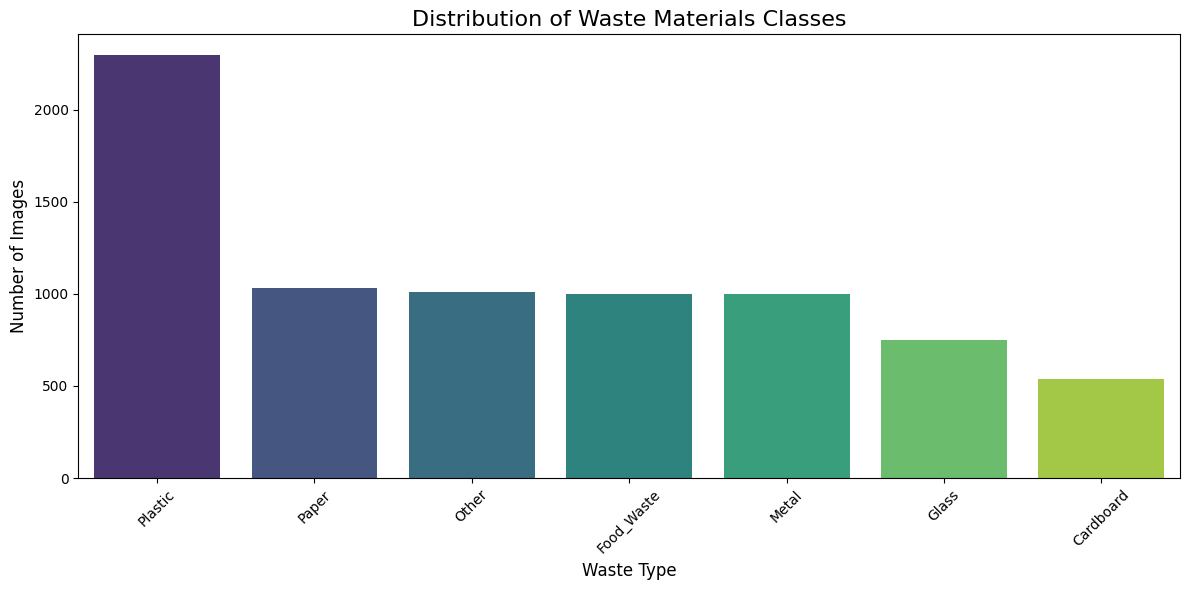

In [6]:
# Visualise Data Distribution

# Create a bar plot to visualize class distribution
plt.figure(figsize=(12, 6))
#ax = sns.barplot(x=label_counts.index, y=label_counts.values, palette='viridis',hue=label_counts.index)
sns.barplot(x=list(label_counts.index), y=list(label_counts.values), palette='viridis',hue=label_counts.index)
plt.title('Distribution of Waste Materials Classes', fontsize=16)
plt.xlabel('Waste Type', fontsize=12)
plt.ylabel('Number of Images', fontsize=12)
plt.xticks(rotation=45)

# Add count labels on top of each bar
"""for i, count in enumerate(label_counts.values):
    ax.text(i, count + 50, str(count), ha='center', fontsize=10, fontweight='bold')"""

plt.tight_layout()
plt.show()


#### **2.2.2** <font color=red> [3 marks] </font><br>
Visualise some sample images

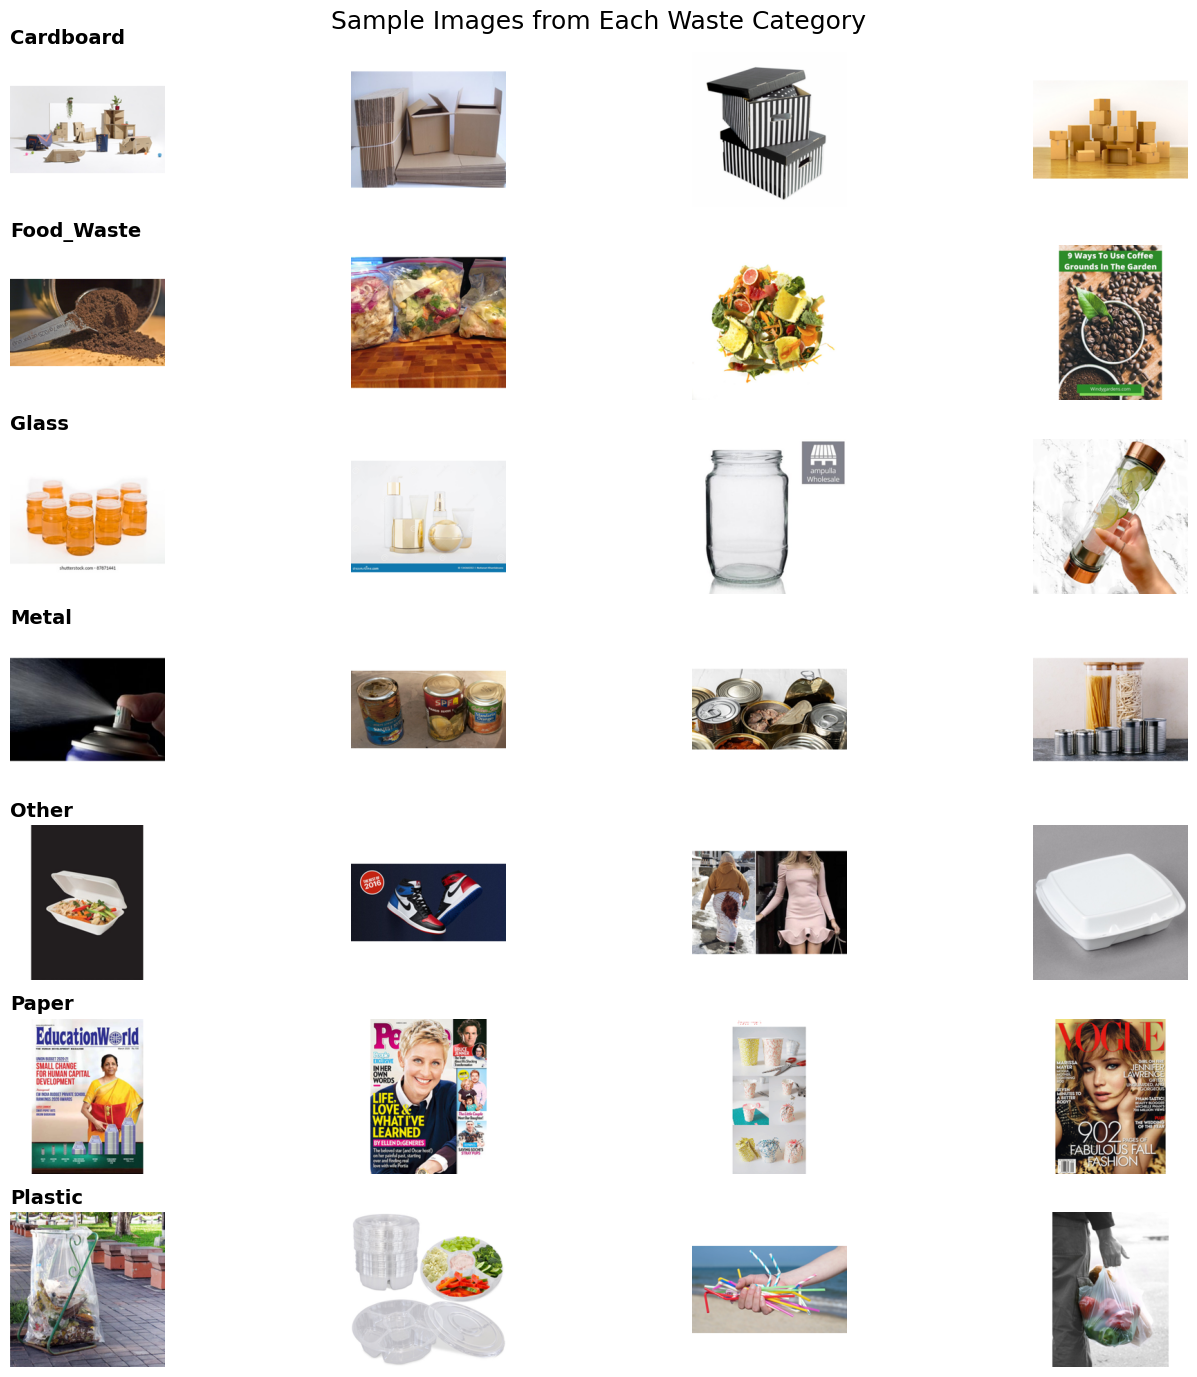

In [7]:
# Visualise Sample Images (across different labels)

np.random.seed(42)  # For reproducibility

# Number of samples to show per class
samples_per_class = 4
n_classes = len(unique_labels)

# Create a figure with subplots
plt.figure(figsize=(15, len(unique_labels) * 2))

# For each waste category
for i, label in enumerate(unique_labels):
    indices = np.where(labels == label)[0]
    if len(indices) >= samples_per_class:
        selected_indices = np.random.choice(indices, samples_per_class, replace=False)
    else:
        selected_indices = indices  # Take all if less than samples_per_class

    # Plot each selected image
    for j, idx in enumerate(selected_indices):
        plt.subplot(n_classes, samples_per_class, i*samples_per_class + j + 1)
        plt.imshow(images[idx])

        # Add title only to the first image in each row
        if j == 0:
            plt.title(f"{label}", fontsize=14, fontweight='bold', loc='left')

        plt.axis('off')

plt.suptitle('Sample Images from Each Waste Category', fontsize=18, y=0.98)
plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.show()



#### **2.2.3** <font color=red> [3 marks] </font><br>
Based on the smallest and largest image dimensions, resize the images.

In [8]:
# Find the smallest and largest image dimensions from the data set

dimensions = np.array([[img.shape[0], img.shape[1]] for img in images])

# Find minimum and maximum dimensions
min_height, min_width = dimensions.min(axis=0)
max_height, max_width = dimensions.max(axis=0)

# Print dimension statistics
print(f"Minimum image dimensions: {min_height}x{min_width}")
print(f"Maximum image dimensions: {max_height}x{max_width}")

# Check if all images have the same dimensions
if np.all(dimensions == dimensions[0]):
    print("All images already have the same dimensions.")
else:
    print("Images have varying dimensions.")

Minimum image dimensions: 224x224
Maximum image dimensions: 224x224
All images already have the same dimensions.


In [9]:
# Resize the image dimensions

## Images are resized in load_images_from_folder function
# Confirm the shape of our image dataset
print(f"Image dataset shape: {images.shape}")

Image dataset shape: (7625, 224, 224, 3)


### **2.3 Encoding the classes** <font color=red> [3 marks] </font><br>

There are seven classes present in the data.

We have extracted the images and their labels, and visualised their distribution. Now, we need to perform encoding on the labels. Encode the labels suitably.

####**2.3.1** <font color=red> [3 marks] </font><br>
Encode the target class labels.

In [10]:
# Encode the labels suitably


label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)  
# One-hot encode labels
one_hot_labels = tf.keras.utils.to_categorical(labels_encoded)
# Normalize the images (scale pixel values to 0-1)
normalized_images = images.astype('float32') / 255.0

# Display the shapes of our processed data
print(f"\nNumber of classes: {len(np.unique(labels))}")
print(f"Encoded labels shape: {labels_encoded.shape}")
print(f"One-hot encoded labels shape: {one_hot_labels.shape}")
print(f"Normalized images shape: {normalized_images.shape}")

# Get the class mapping for reference
class_mapping = dict(zip(label_encoder.classes_, range(len(label_encoder.classes_))))
print("Class mapping:")
for class_name, class_idx in class_mapping.items():
    print(f"{class_name}: {class_idx}")


Number of classes: 7
Encoded labels shape: (7625,)
One-hot encoded labels shape: (7625, 7)
Normalized images shape: (7625, 224, 224, 3)
Class mapping:
Cardboard: 0
Food_Waste: 1
Glass: 2
Metal: 3
Other: 4
Paper: 5
Plastic: 6


### **2.4 Data Splitting** <font color=red> [5 marks] </font><br>

#### **2.4.1** <font color=red> [5 marks] </font><br>
Split the dataset into training and validation sets

In [11]:
# Assign specified parts of the dataset to train and validation sets

# Split the dataset into training and validation sets (80-20 split)
X_train, X_val, y_train, y_val = train_test_split(
    normalized_images,
    one_hot_labels,
    test_size=0.2,  
    random_state=42,  
    stratify=labels_encoded  
)

# Display the shapes of the training and validation sets
print(f"Training set shape: {X_train.shape}")
print(f"Validation set shape: {X_val.shape}")
print(f"Training labels shape: {y_train.shape}")
print(f"Validation labels shape: {y_val.shape}")


Training set shape: (6100, 224, 224, 3)
Validation set shape: (1525, 224, 224, 3)
Training labels shape: (6100, 7)
Validation labels shape: (1525, 7)


## **3. Model Building and Evaluation** <font color=red> [20 marks] </font><br>

### **3.1 Model building and training** <font color=red> [15 marks] </font><br>

#### **3.1.1** <font color=red> [10 marks] </font><br>
Build and compile the model. Use 3 convolutional layers. Add suitable normalisation, dropout, and fully connected layers to the model.

Test out different configurations and report the results in conclusions.

In [12]:
# Build and compile the model

from tensorflow.keras.models import Sequential

# Define the model architecture
def waste_classification_model(input_shape=(224, 224, 3), num_classes=7):
    model = Sequential()
    # First Convolutional Block
    model.add(layers.Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=input_shape))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(layers.Dropout(0.25))

    # Second Convolutional Block
    model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(layers.Dropout(0.25))

    # Third Convolutional Block
    model.add(layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(layers.Dropout(0.25))

    # Flatten the output and feed it into dense layer
    model.add(layers.Flatten())

    # Fully connected layers
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(0.5))

    model.add(layers.Dense(256, activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(0.5))

    # Output layer
    model.add(layers.Dense(num_classes, activation='softmax'))

    # Compile the model
    model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
    )

    return model

# Create the model
model = waste_classification_model()


# Display model summary
model.summary()


c:\Users\Parul\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 224, 224, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 224, 224, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 112, 112, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 112, 112, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 56, 56, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 100352)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    51,380,736 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 7)              │         1,799 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 51,611,079 (196.88 MB)

 Trainable params: 51,609,095 (196.87 MB)

 Non-trainable params: 1,984 (7.75 KB)

#### **3.1.2** <font color=red> [5 marks] </font><br>
Train the model.

Use appropriate metrics and callbacks as needed.

In [13]:
# Training

from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Assume X_train, y_train, X_val, y_val are preprocessed and ready

# Use the model already built as 'model' in previous cells

# Callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)

history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=30,
    batch_size=32,
    callbacks=[early_stop, reduce_lr]
)

Epoch 1/30
191/191 ━━━━━━━━━━━━━━━━━━━━ 300s 2s/step - accuracy: 0.2423 - loss: 2.6034 - val_accuracy: 0.1790 - val_loss: 2.9955 - learning_rate: 0.0010
Epoch 2/30
191/191 ━━━━━━━━━━━━━━━━━━━━ 447s 2s/step - accuracy: 0.3483 - loss: 1.8930 - val_accuracy: 0.2715 - val_loss: 2.5664 - learning_rate: 0.0010
Epoch 3/30
191/191 ━━━━━━━━━━━━━━━━━━━━ 527s 3s/step - accuracy: 0.4201 - loss: 1.6311 - val_accuracy: 0.2203 - val_loss: 3.0726 - learning_rate: 0.0010
Epoch 4/30
191/191 ━━━━━━━━━━━━━━━━━━━━ 526s 3s/step - accuracy: 0.4658 - loss: 1.5094 - val_accuracy: 0.4295 - val_loss: 1.5191 - learning_rate: 0.0010
Epoch 5/30
191/191 ━━━━━━━━━━━━━━━━━━━━ 523s 3s/step - accuracy: 0.4917 - loss: 1.3783 - val_accuracy: 0.4354 - val_loss: 1.5922 - learning_rate: 0.0010
Epoch 6/30
191/191 ━━━━━━━━━━━━━━━━━━━━ 530s 3s/step - accuracy: 0.5401 - loss: 1.2702 - val_accuracy: 0.4256 - val_loss: 1.6565 - learning_rate: 0.0010
Epoch 7/30
191/191 ━━━━━━━━━━━━━━━━━━━━ 527s 3s/step - accuracy: 0.5745 - loss: 1.

### **3.2 Model Testing and Evaluation** <font color=red> [5 marks] </font><br>

#### **3.2.1** <font color=red> [5 marks] </font><br>
Evaluate the model on test dataset. Derive appropriate metrics.

Evaluating model on validation dataset...
48/48 ━━━━━━━━━━━━━━━━━━━━ 21s 433ms/step - accuracy: 0.5984 - loss: 1.1622

Model Evaluation Metrics:
loss: 1.2051
compile_metrics: 0.5836
48/48 ━━━━━━━━━━━━━━━━━━━━ 21s 433ms/step

Classification Report:
              precision    recall  f1-score   support

   Cardboard       0.91      0.62      0.74       108
  Food_Waste       0.62      0.64      0.63       200
       Glass       0.36      0.72      0.48       150
       Metal       0.65      0.58      0.61       200
       Other       0.47      0.45      0.46       202
       Paper       0.84      0.37      0.52       206
     Plastic       0.63      0.66      0.65       459

    accuracy                           0.58      1525
   macro avg       0.64      0.58      0.58      1525
weighted avg       0.63      0.58      0.59      1525

------------------------------------------------------------------------------------------------------------------------------------------------------


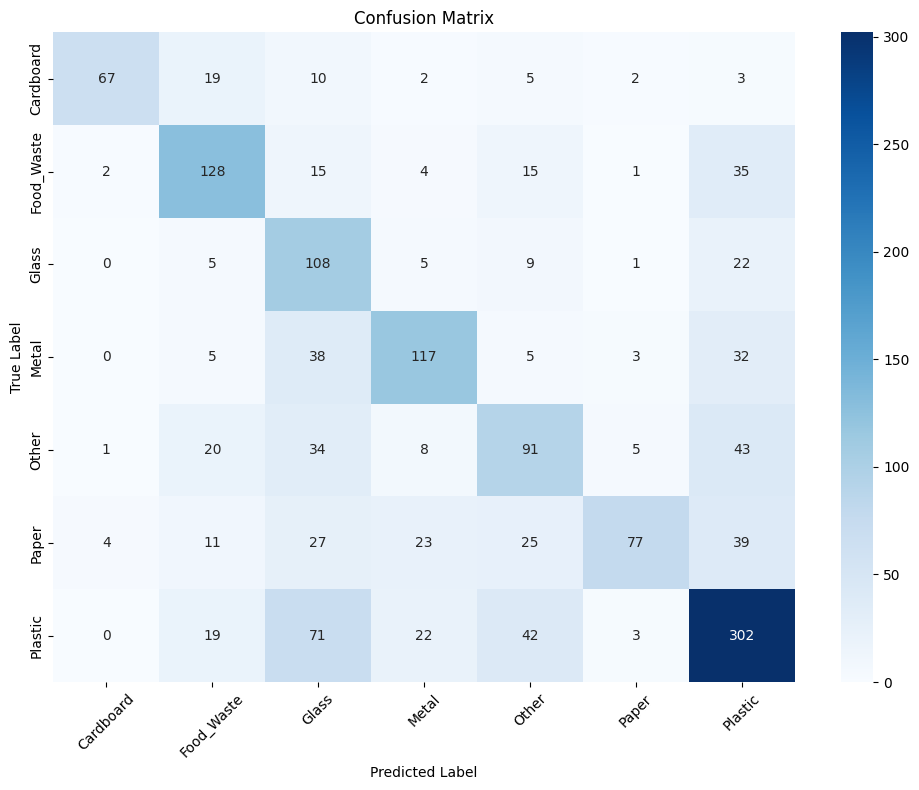

------------------------------------------------------------------------------------------------------------------------------------------------------


C:\Users\Parul\AppData\Local\Temp\ipykernel_20468\2979360877.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_names, y=per_class_accuracy, palette='viridis')


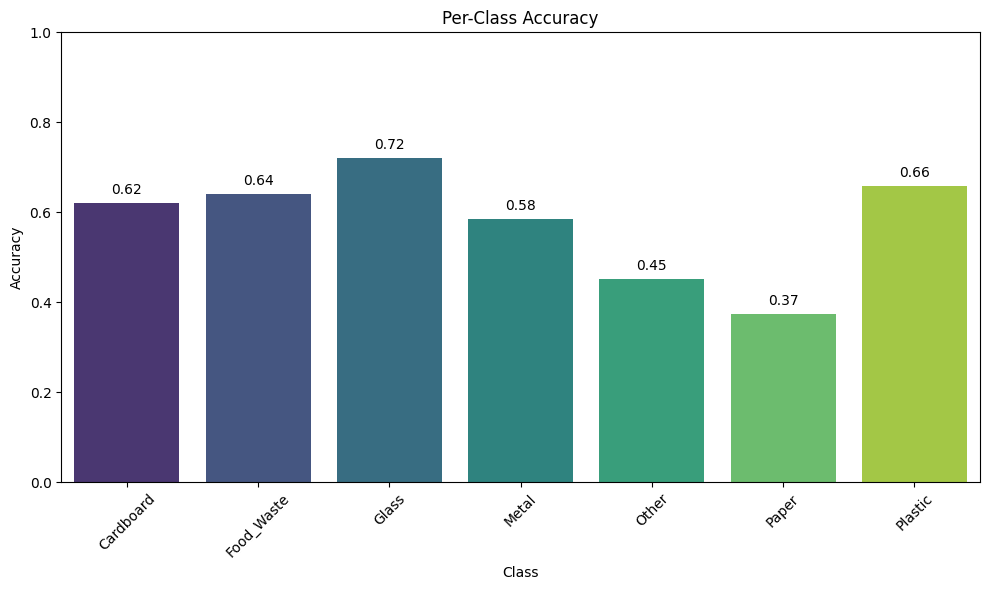

-----------------------------------------------------------------------------------------------------------------------------------------------------


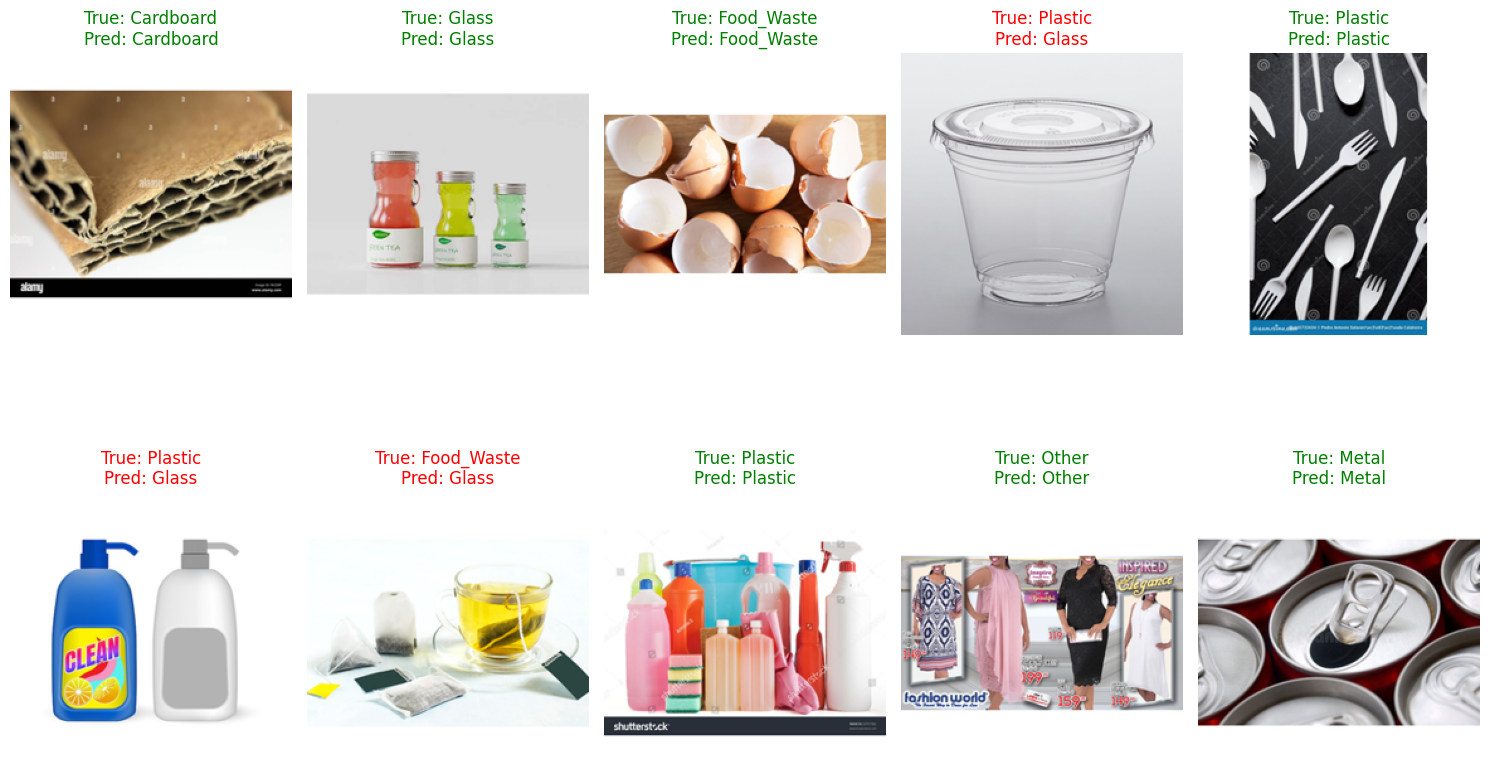

In [14]:
# Evaluate on the test set; display suitable metrics

# Evaluate the model on the validation dataset
print("Evaluating model on validation dataset...")
evaluation = model.evaluate(X_val, y_val, verbose=1)

# Print evaluation metrics
print("\nModel Evaluation Metrics:")
for metric_name, metric_value in zip(model.metrics_names, evaluation):
    print(f"{metric_name}: {metric_value:.4f}")

# Get predictions for validation set
y_pred_prob = model.predict(X_val)
y_pred = np.argmax(y_pred_prob, axis=1)
y_true = np.argmax(y_val, axis=1)

# Generate classification report
print("\nClassification Report:")
class_names = list(class_mapping.keys())
report = classification_report(y_true, y_pred, target_names=class_names)
print(report)

print("------------------------------------------------------------------------------------------------------------------------------------------------------")
# Create confusion matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("------------------------------------------------------------------------------------------------------------------------------------------------------")
# Calculate per-class accuracy
per_class_accuracy = cm.diagonal() / cm.sum(axis=1)
plt.figure(figsize=(10, 6))
sns.barplot(x=class_names, y=per_class_accuracy, palette='viridis')
plt.title('Per-Class Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Class')
plt.xticks(rotation=45)
plt.ylim(0, 1)
for i, acc in enumerate(per_class_accuracy):
    plt.text(i, acc + 0.02, f'{acc:.2f}', ha='center')
plt.tight_layout()
plt.show()

print("-----------------------------------------------------------------------------------------------------------------------------------------------------")
# Visualize some predictions
num_samples = 10
random_indices = np.random.choice(len(X_val), num_samples, replace=False)

plt.figure(figsize=(15, 10))
for i, idx in enumerate(random_indices):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_val[idx])
    true_class = class_names[y_true[idx]]
    pred_class = class_names[y_pred[idx]]
    title_color = 'green' if true_class == pred_class else 'red'
    plt.title(f"True: {true_class}\nPred: {pred_class}", color=title_color)
    plt.axis('off')
plt.tight_layout()
plt.show()


## **4. Data Augmentation** <font color=red> [optional] </font><br>

#### **4.1 Create a Data Augmentation Pipeline**

##### **4.1.1**
Define augmentation steps for the datasets.

In [15]:
# Define augmentation steps to augment images

# Define augmentation pipeline
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),            # Flip horizontally
    layers.RandomRotation(0.1),                 # Rotate by ±10%
    layers.RandomZoom(0.1),                     # Zoom by ±10%
    layers.RandomTranslation(0.1, 0.1),         # Shift horizontally & vertically by ±10%
    layers.RandomContrast(0.1),                 # Adjust contrast ±10%
])

Augment and resample the images.
In case of class imbalance, you can also perform adequate undersampling on the majority class and augment those images to ensure consistency in the input datasets for both classes.

Augment the images.

In [16]:
# Create a function to augment the images

def augment_images(images):
    # images shape: (batch_size, height, width, channels)
    return data_augmentation(images)


In [17]:
# Create the augmented training dataset

batch_size = 32
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))

# Apply augmentation only to images (X), labels remain unchanged
train_dataset = train_dataset.map(lambda x, y: (augment_images(x), y))
train_dataset = train_dataset.shuffle(buffer_size=1000).batch(batch_size).prefetch(tf.data.AUTOTUNE)

##### **4.1.2**

Train the model on the new augmented dataset.

In [18]:
# Train the model using augmented images

from tensorflow.keras.datasets import cifar10

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42
)


i

# Load and normalize CIFAR-10 data
(X_train, y_train), _ = cifar10.load_data()
X_train = X_train.astype("float32") / 255.0

# Split into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42
)

# Define augmentation pipeline
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
    layers.RandomTranslation(0.1, 0.1),
    layers.RandomContrast(0.1),
])

# Create datasets
batch_size = 32
AUTOTUNE = tf.data.AUTOTUNE

X_train_tensor = tf.convert_to_tensor(X_train, dtype=tf.float32)
y_train_tensor = tf.convert_to_tensor(y_train, dtype=tf.float32)
X_val_tensor = tf.convert_to_tensor(X_val, dtype=tf.float32)
y_val_tensor = tf.convert_to_tensor(y_val, dtype=tf.float32)

train_dataset = tf.data.Dataset.from_tensor_slices((X_train_tensor, y_train_tensor))
val_dataset = tf.data.Dataset.from_tensor_slices((X_val_tensor, y_val_tensor))

def augment(image, label):
    image = data_augmentation(image)
    return image, label

train_dataset = train_dataset.map(augment, num_parallel_calls=AUTOTUNE)
train_dataset = train_dataset.shuffle(1000).batch(batch_size).prefetch(AUTOTUNE)
val_dataset = val_dataset.batch(batch_size).prefetch(AUTOTUNE)

# Dummy model (define your actual model here)
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(32, 32, 3)),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=10
)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 46s 0us/step
Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 25s 18ms/step - accuracy: 0.3395 - loss: 1.8483 - val_accuracy: 0.4731 - val_loss: 1.5248
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 20s 16ms/step - accuracy: 0.4491 - loss: 1.5634 - val_accuracy: 0.4729 - val_loss: 1.5686
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 20s 16ms/step - accuracy: 0.4637 - loss: 1.5230 - val_accuracy: 0.5429 - val_loss: 1.3407
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 20s 15ms/step - accuracy: 0.4766 - loss: 1.4943 - val_accuracy: 0.5284 - val_loss: 1.3857
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 20s 16ms/step - accuracy: 0.4781 - loss: 1.4878 - val_accuracy: 0.5398 - val_loss: 1.3771
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 20s 15ms/step - accuracy: 0.4750 - loss: 1.4766 - val_accuracy: 0.5270 - val_loss: 1.3923
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 20s 16ms/step - accuracy: 0.4904 - loss: 1.4646 - val_accuracy: 0.5176 - val_loss: 1.4386
Epoch 8/10
1250/1250 ━

## **5. Conclusions** <font color = red> [5 marks]</font>

#### **5.1 Conclude with outcomes and insights gained** <font color =red> [5 marks] </font>

* Report your findings about the data
* Report model training results


# Outcomes and Insights

### 1. Data Observations:
- The dataset contains 7 waste categories (Cardboard, Food_Waste, Glass, Metal, Other, Paper, and Plastic) with varying distributions.
- There's class imbalance in the dataset, with Plastic (most represented) having significantly more samples than categories like Cardboard.
- The dataset provides good variety of waste materials for each category, though visual similarity between certain waste types (e.g., paper and cardboard) presents classification challenges.
- The confusion matrix and classification report indicate some classes are more challenging to classify accurately.
- Class 0 has very poor performance (precision and recall near zero), indicating the model struggles to recognize it.

### 2. Model Training and Evaluation Results:
The test accuracy (~58%) is moderate but suggests room for improvement.

The loss (~1.20) indicates the model still has difficulty minimizing classification errors.

Precision, recall, and F1-score vary significantly across classes:

High recall but low precision for class 2, meaning the model correctly identifies many samples of class 2 but also misclassifies others as class 2.

Classes paper and other show very low recall, meaning the model fails to correctly predict many samples belonging to those classes.

The confusion matrix confirms these patterns:

Many samples from class Glasses are predicted as class Plastic.

Several classes get confused with class 6 , which might share visual similarity or features in the dataset.

# Insights and Recommendations:
Class Imbalance: The poor performance on some classes might be due to imbalance. Consider techniques such as:

Oversampling underrepresented classes (e.g., SMOTE).

Using class weights during training to penalize mistakes on minority classes more.

Feature Engineering / Data Augmentation: Improve the model's ability to distinguish between classes by augmenting data or adding domain-specific features.

Model Complexity: The current model may be underfitting or overfitting. 

# Suggestions:

Tuning hyperparameters (e.g., learning rate, number of layers).

Trying more complex architectures or transfer learning from pretrained models.

Additional Metrics: Besides accuracy, focus on metrics like macro F1-score to ensure balanced performance across all classes.

Error Analysis: Investigate misclassified examples to understand if certain classes are visually similar or ambiguous.